In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics  import mean_squared_error

# Generate Data

In [2]:
X_train=np.linspace(-1,1,20)

In [3]:
y_train=np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                  -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                  -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                  0.5524 ,  0.23115,  0.20835, 0.4211,0.60485  ])

In [4]:
X_test=np.linspace(-1,1,20)

In [5]:
y_test=np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                 -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                 0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                 0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

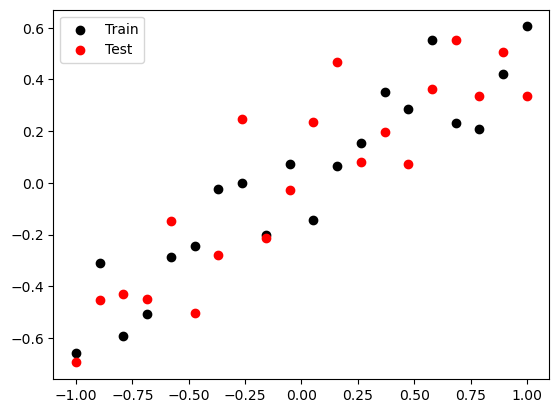

In [6]:
plt.scatter(X_train,y_train,c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.legend()
plt.show()

In [10]:
model=Sequential()

model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])
history=model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [12]:
# evaluate the model
_,train_mse=model.evaluate(X_train,y_train,verbose=0)
_,test_mse=model.evaluate(X_test,y_test,verbose=0)
print('Train:{},Test:{}'.format(train_mse,test_mse))

Train:0.004823086317628622,Test:0.04719917103648186


In [13]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 83ms/step


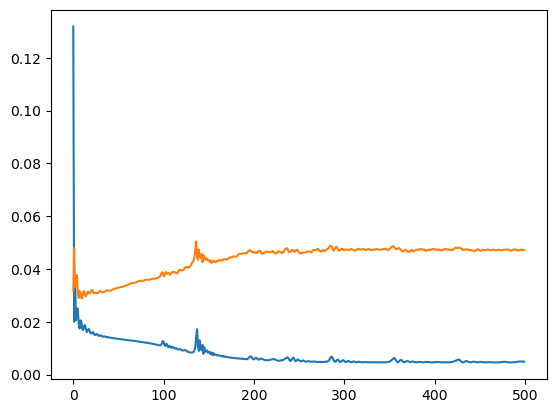

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Dropout Model

In [16]:
model=Sequential()

model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])
history=model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [17]:
# evaluate the model
_,train_mse=model.evaluate(X_train,y_train,verbose=0)
_,test_mse=model.evaluate(X_test,y_test,verbose=0)
print('Train:{},Test:{}'.format(train_mse,test_mse))

Train:0.010599108412861824,Test:0.03912847116589546


In [18]:
model=Sequential()

model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])
history=model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [19]:
# evaluate the model
_,train_mse=model.evaluate(X_train,y_train,verbose=0)
_,test_mse=model.evaluate(X_test,y_test,verbose=0)
print('Train:{},Test:{}'.format(train_mse,test_mse))

Train:0.014941858127713203,Test:0.033894699066877365


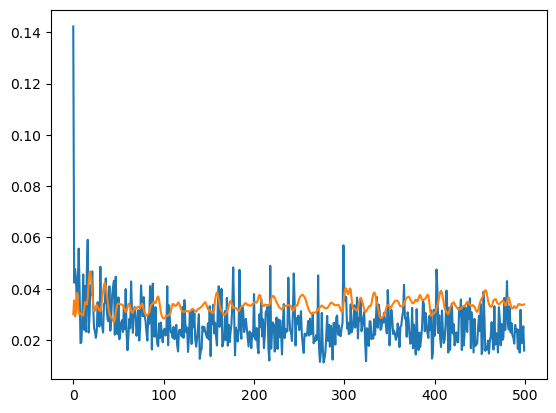

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])